In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
df = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv')

# Display the first few rows of the dataset
print(df.head())

# Data preprocessing (if necessary)
# Assuming the dataset columns are ['ID', 'Entity', 'Sentiment', 'Text']
df.columns = ['ID', 'Entity', 'Sentiment', 'Text']

# Handle missing values
df['Text'] = df['Text'].fillna('')

# Ensure all entries in the 'Text' column are strings
df['Text'] = df['Text'].astype(str)

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


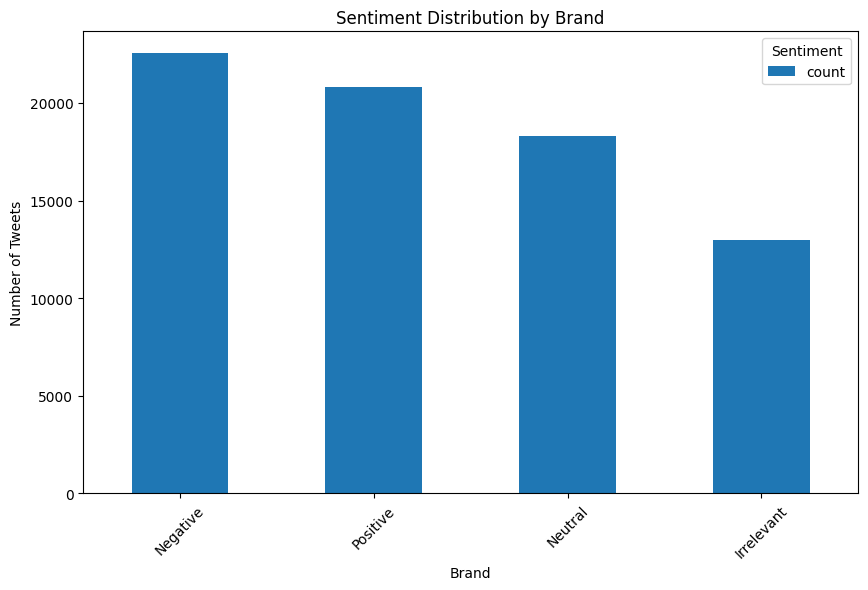

In [2]:
# Sentiment distribution analysis
sentiment_counts = df['Sentiment'].value_counts()

# Plot sentiment distribution for each brand
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

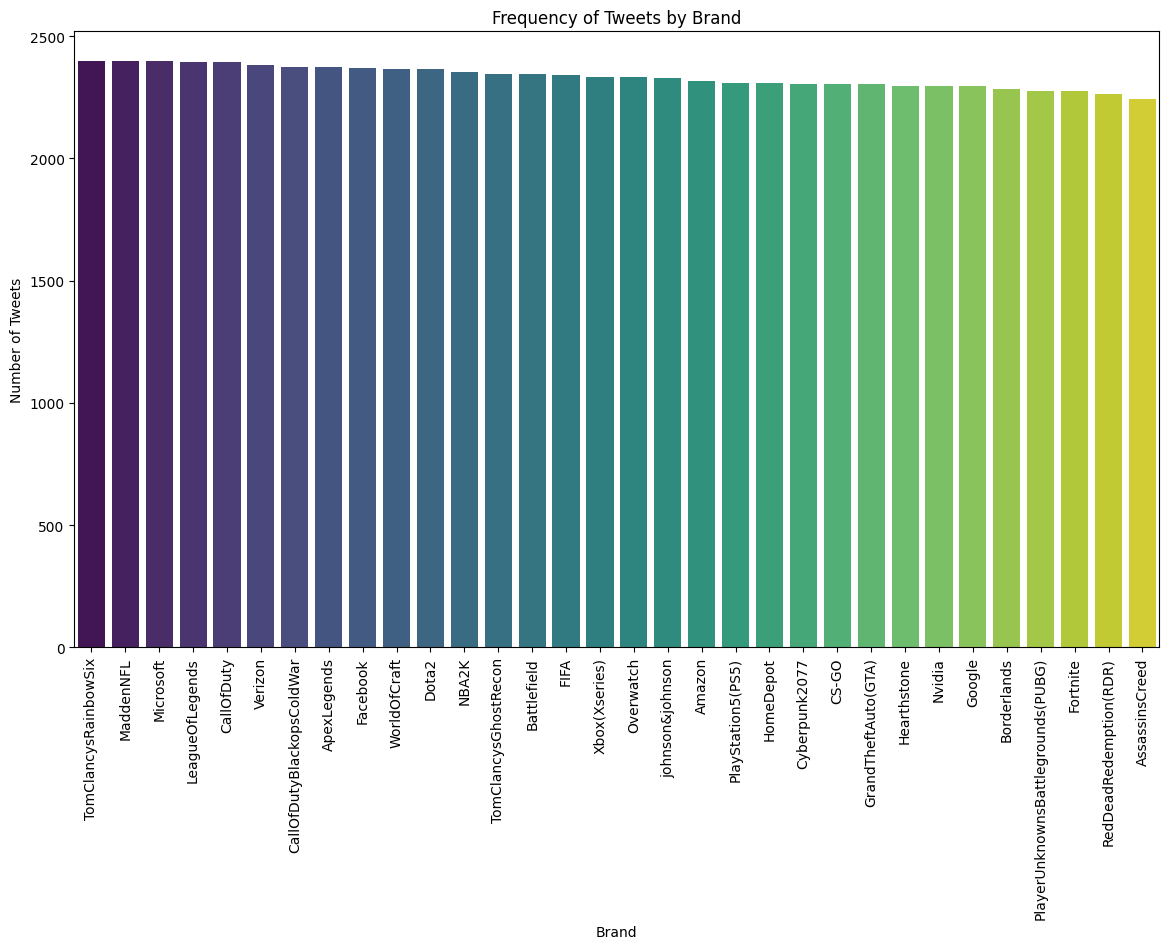

In [3]:
# Count the total number of tweets for each entity
tweet_counts = df['Entity'].value_counts()

# Plot the frequency of tweets for each brand
plt.figure(figsize=(14, 8))
sns.barplot(x=tweet_counts.index, y=tweet_counts.values, palette='viridis')
plt.title('Frequency of Tweets by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)
plt.show()

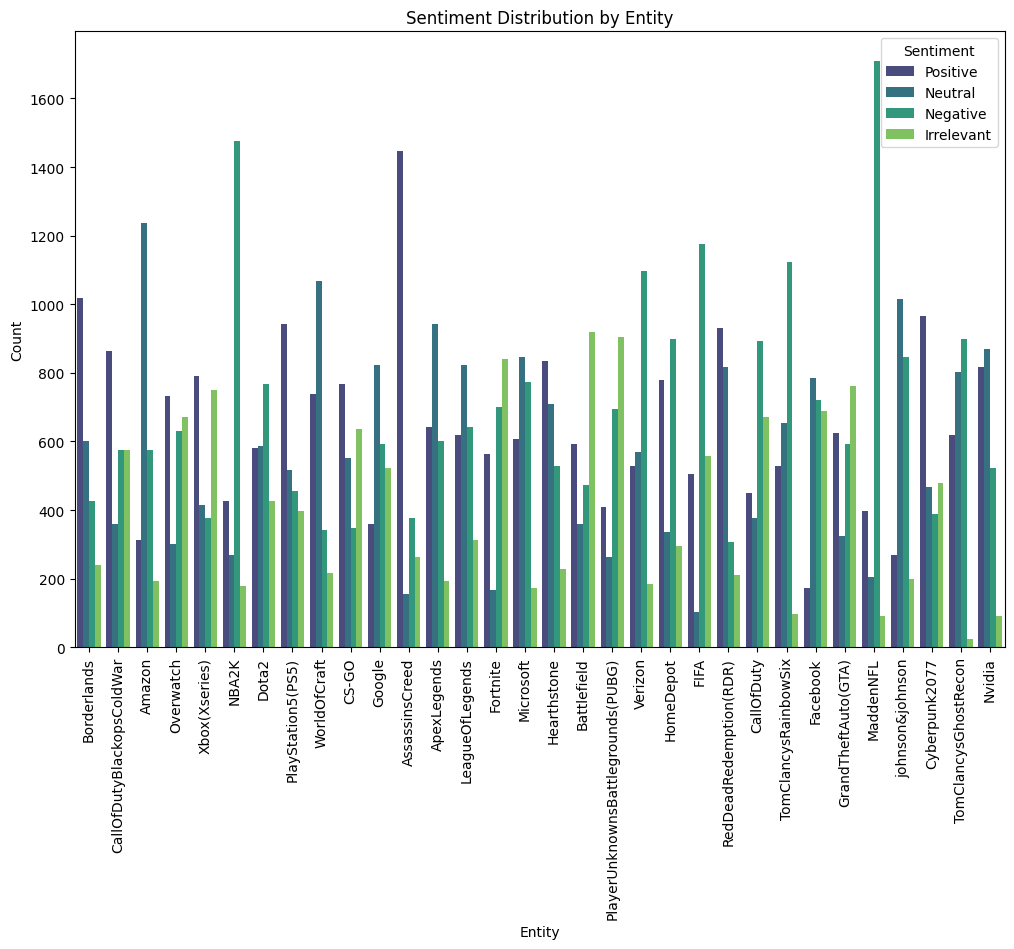

In [4]:
# Sentiment distribution by entity
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Entity', hue='Sentiment', palette='viridis')
plt.title('Sentiment Distribution by Entity')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


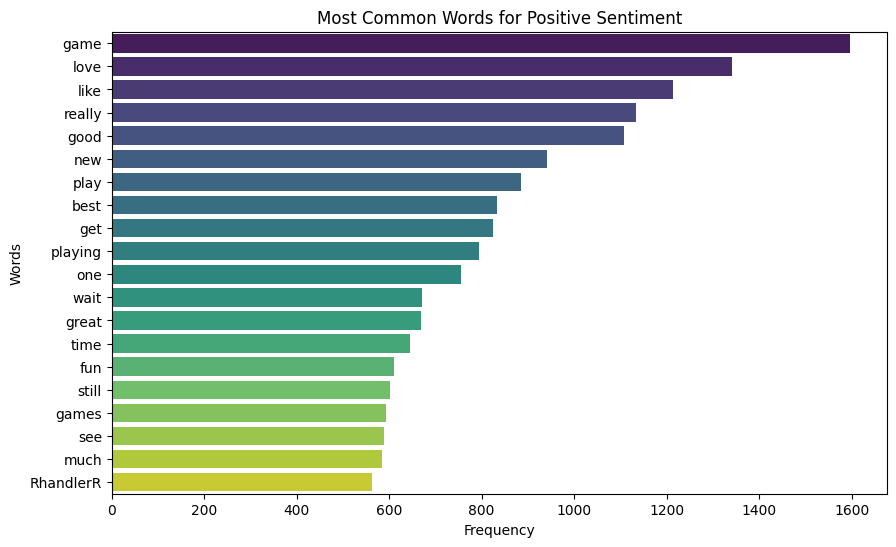

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


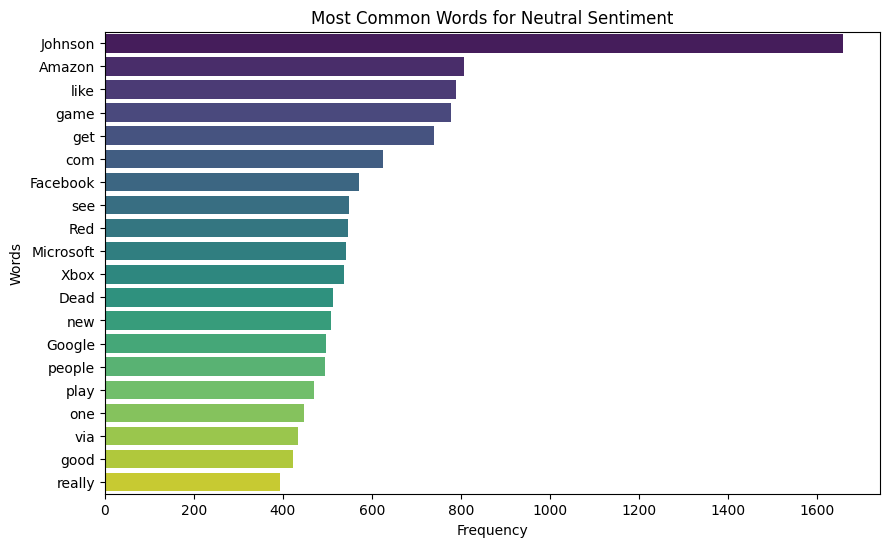

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


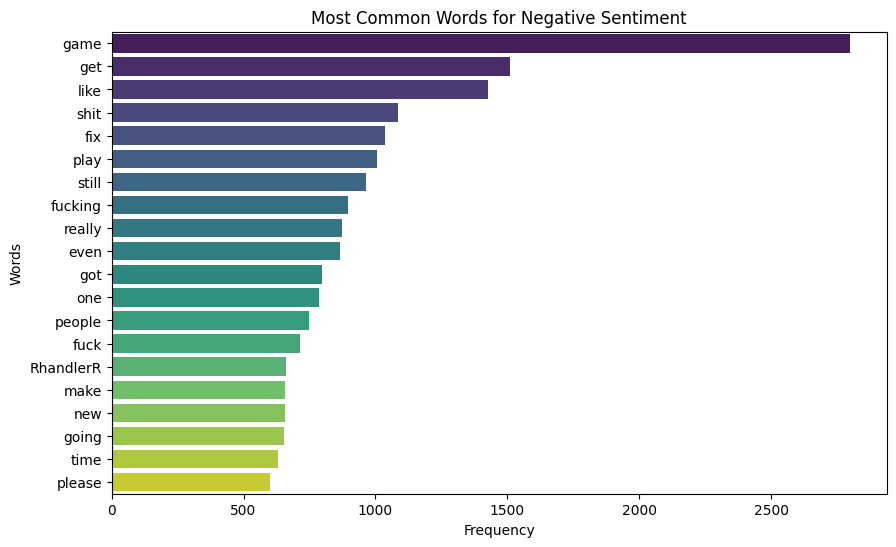

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


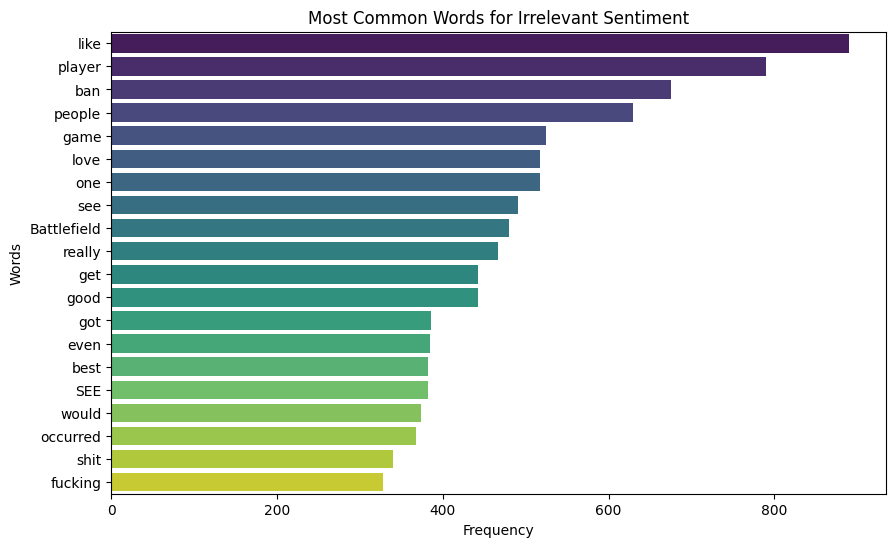

In [5]:
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Download stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def get_top_words(text, n=20):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words and word.isalpha()]
    word_counts = Counter(filtered_words)
    return word_counts.most_common(n)
sentiments = df['Sentiment'].unique()
# Top words for each sentiment
for sentiment in sentiments:
    text = ' '.join(df[df['Sentiment'] == sentiment]['Text'])
    top_words = get_top_words(text)
    words, counts = zip(*top_words)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(f'Most Common Words for {sentiment} Sentiment')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()


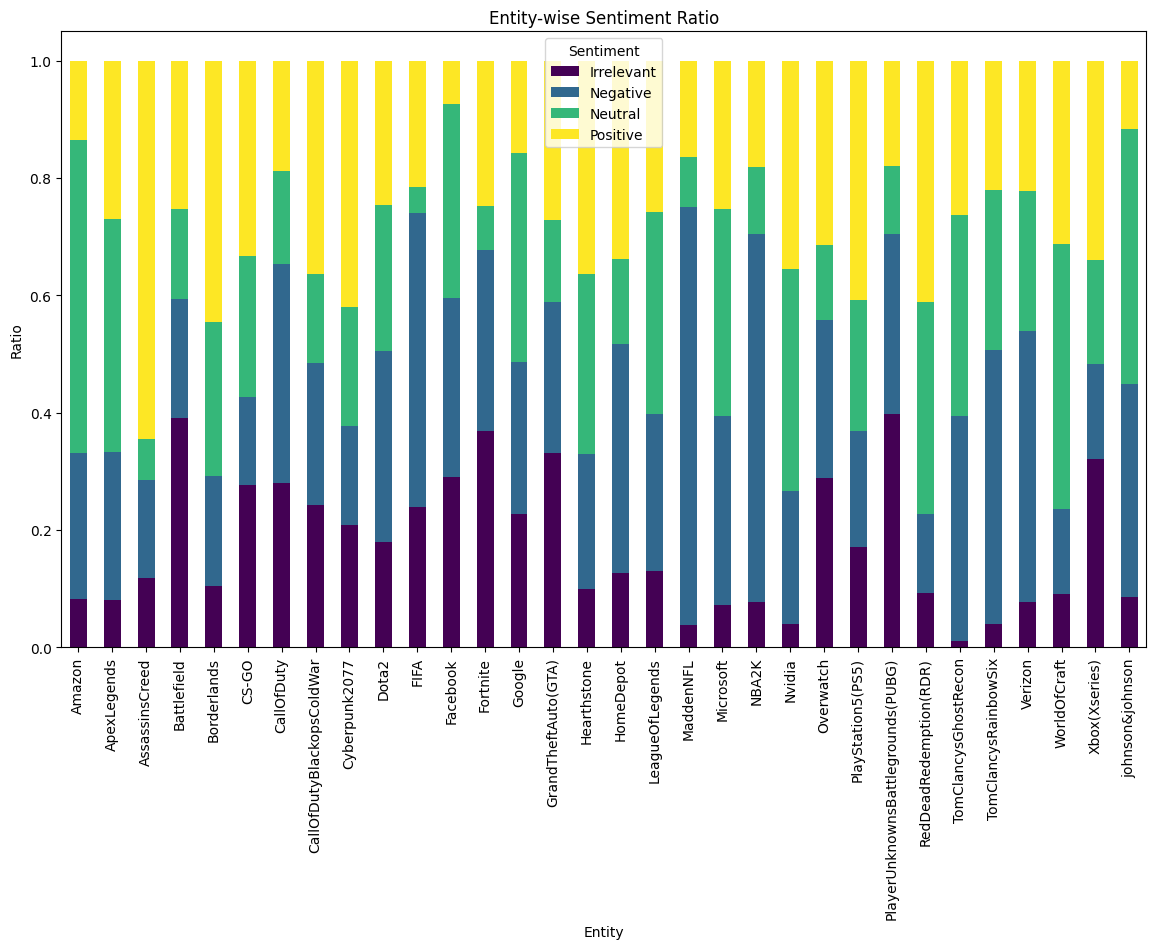

In [6]:
# Calculate sentiment ratio for each entity
entity_sentiment_ratio = df.groupby('Entity')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)

# Visualization of sentiment ratio by entity
entity_sentiment_ratio.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Entity-wise Sentiment Ratio')
plt.xlabel('Entity')
plt.ylabel('Ratio')
plt.legend(title='Sentiment')
plt.show()

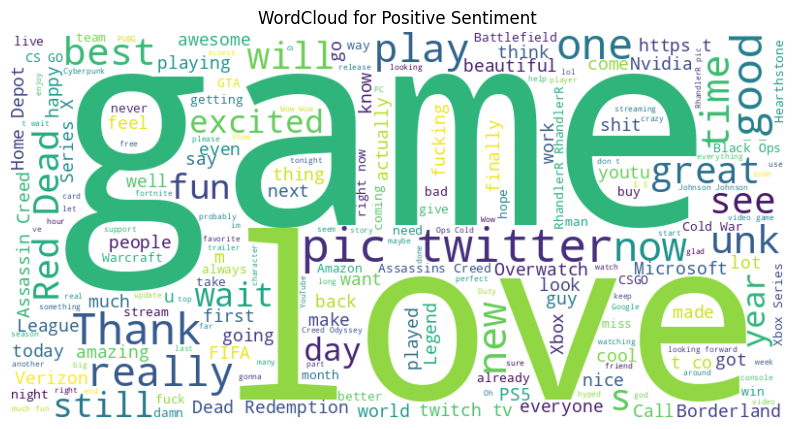

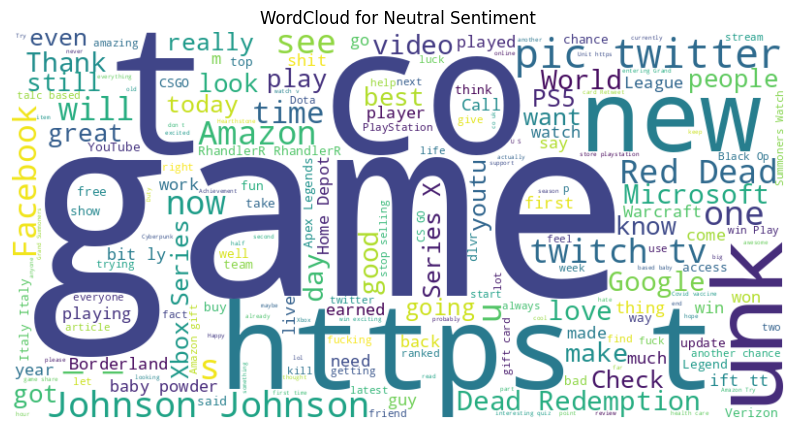

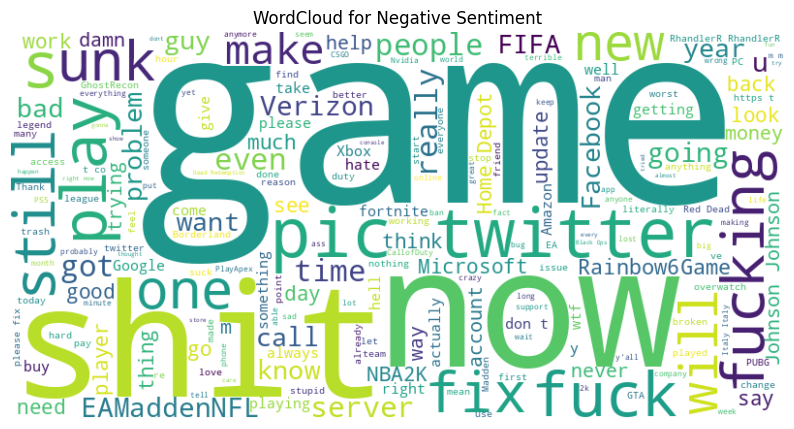

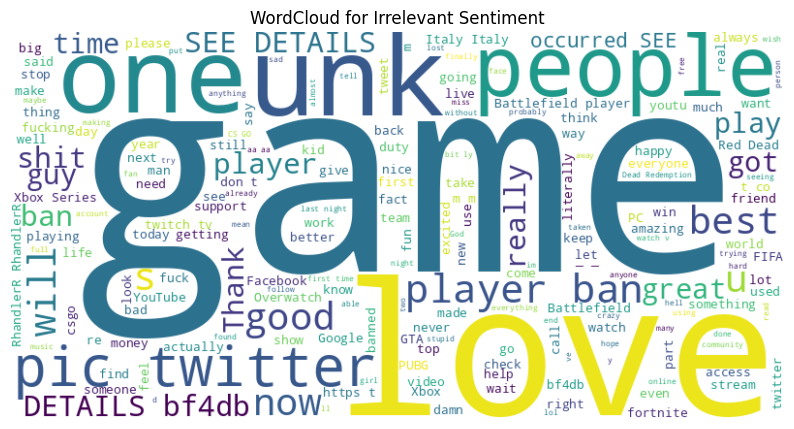

In [7]:
# Visualization: WordCloud for each sentiment
sentiments = df['Sentiment'].unique()
for sentiment in sentiments:
    text = ' '.join(df[df['Sentiment'] == sentiment]['Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()